In [1]:
# Import the dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitude and longtitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the lats and lngs to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the lats and lngs combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-80.33666251663755 22.89839086714578
-85.12228331486047 -23.581379149977224
-29.142268174754328 -43.02500186181737
-70.3780276817115 -43.86056203883354
-23.74691271604489 -18.10966004923675
37.3280691487835 -24.92658843161118
-11.546142141225275 48.803417124008035
8.614066881229093 20.703722713246265
-74.70161775396902 -35.66249222673873
81.77152882836356 -17.585128832349582
0.1304586566681536 -74.05414511219834
-60.971438499271045 -53.57006363392294
-53.04334293277659 55.10175627439418
-49.55391703842277 48.78103439362309
59.91433789221588 -50.81759646260183
-1.2602063579567186 -87.24384902703592
31.37312632416952 -55.965231965920246
-65.1678508237109 24.093004388908042
-47.53279243934846 34.05514419663025
-52.22091842235419 45.387330955951455
68.48853900849255 56.264713776327994
70.66669381446695 7.5399026082143195
-66.32317298094378 -10.650610587353668
48.23177007037552 42.50241161442804
-15.301200287051188 -21.00089571676888
-44.7864734251761 -63.39962468874404
-13.817069821513257 

31.099165820485837 72.95720480215692
30.146299990765016 -74.18951381608396
24.408489528750223 -47.64869052122876
4.237603342271527 53.70128601530391
-12.68512046756851 88.78761485039826
20.58115185980519 -86.54367250141863
54.15130396360556 85.75254548741788
-47.93871543780077 -71.27596703788224
52.12175816618378 -80.31560229508938
-50.265619039333615 45.161704515942034
-76.24980315071323 18.52022725550816
51.37451915269472 -29.181104840346485
12.51369046421486 60.914628934156354
48.807823953758515 87.58469104513023
-29.725863290814942 68.75966954541397
-66.57722573783289 -1.8114889129424085
7.351912091482916 -53.18525688627056
-27.77006028240246 35.818389465456306
37.46016842585924 -72.19090506023345
-59.73987269820395 52.697516033512585
-13.342496588786872 -12.660561187176413
-40.600418015901504 -66.54925666145765
20.387627492242416 -71.07141169313715
-47.26360054599551 -14.323809912808827
-53.644760199364114 -65.2052368967706
-54.754009738377476 -73.42519430935349
55.32056298289484 

In [6]:
# Import citipy
from citipy import citipy

In [7]:
# Create a list for holding cities.
cities = []

# Identify the nearest city for each lat and lng combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

589

In [9]:
# Import requests liblary
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | imbituba
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | vila franca do campo
Processing Record 6 of Set 1 | ambilobe
Processing Record 7 of Set 1 | ndele
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | puerto leguizamo
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 12 of Set 1 | paamiut
Processing Record 13 of Set 1 | san cristobal
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | usinsk
Processing Record 18 of Set 1 | sorland
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | oblivskaya
Pro

Processing Record 39 of Set 4 | ust-tsilma
Processing Record 40 of Set 4 | west bay
Processing Record 41 of Set 4 | manta
Processing Record 42 of Set 4 | akureyri
Processing Record 43 of Set 4 | nanortalik
Processing Record 44 of Set 4 | buraydah
Processing Record 45 of Set 4 | vestmannaeyjar
Processing Record 46 of Set 4 | macusani
Processing Record 47 of Set 4 | chapais
Processing Record 48 of Set 4 | montepuez
Processing Record 49 of Set 4 | ilmajoki
Processing Record 50 of Set 4 | machinga
Processing Record 1 of Set 5 | ilulissat
Processing Record 2 of Set 5 | kamenka
Processing Record 3 of Set 5 | badou
Processing Record 4 of Set 5 | lerwick
Processing Record 5 of Set 5 | pocosol
Processing Record 6 of Set 5 | isla mujeres
Processing Record 7 of Set 5 | adrar
Processing Record 8 of Set 5 | shatsk
Processing Record 9 of Set 5 | ribeira grande
Processing Record 10 of Set 5 | amderma
City not found. Skipping...
Processing Record 11 of Set 5 | shubarshi
Processing Record 12 of Set 5 |

Processing Record 27 of Set 8 | aleksandrov gay
Processing Record 28 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 29 of Set 8 | vestmanna
Processing Record 30 of Set 8 | fort wayne
Processing Record 31 of Set 8 | quatre cocos
Processing Record 32 of Set 8 | kargasok
Processing Record 33 of Set 8 | mwense
Processing Record 34 of Set 8 | yorosso
Processing Record 35 of Set 8 | zharkent
Processing Record 36 of Set 8 | asfi
Processing Record 37 of Set 8 | high rock
Processing Record 38 of Set 8 | neuquen
Processing Record 39 of Set 8 | saint-lo
Processing Record 40 of Set 8 | san luis
Processing Record 41 of Set 8 | pitimbu
Processing Record 42 of Set 8 | nara
Processing Record 43 of Set 8 | sazonovo
Processing Record 44 of Set 8 | upington
Processing Record 45 of Set 8 | xuddur
Processing Record 46 of Set 8 | sayyan
Processing Record 47 of Set 8 | koslan
Processing Record 48 of Set 8 | joensuu
Processing Record 49 of Set 8 | esmeraldas
Processing Record 50 

Processing Record 11 of Set 12 | colquechaca
Processing Record 12 of Set 12 | kabo
Processing Record 13 of Set 12 | trincomalee
Processing Record 14 of Set 12 | stromness
Processing Record 15 of Set 12 | miraflores
Processing Record 16 of Set 12 | ukhta
Processing Record 17 of Set 12 | havelock
Processing Record 18 of Set 12 | calama
Processing Record 19 of Set 12 | shuyskoye
Processing Record 20 of Set 12 | cankuzo
Processing Record 21 of Set 12 | bud
Processing Record 22 of Set 12 | dipalpur
Processing Record 23 of Set 12 | viligili
City not found. Skipping...
Processing Record 24 of Set 12 | alexandria
Processing Record 25 of Set 12 | nushki
Processing Record 26 of Set 12 | bhongir
Processing Record 27 of Set 12 | yola
Processing Record 28 of Set 12 | bandarbeyla
Processing Record 29 of Set 12 | san carlos de bariloche
Processing Record 30 of Set 12 | terrace bay
Processing Record 31 of Set 12 | ellisras
Processing Record 32 of Set 12 | paucartambo
City not found. Skipping...
Proces

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,56.61,80,48,3.80,ZA,2023-10-24 19:10:37
1,Ushuaia,-54.8000,-68.3000,55.02,71,98,8.32,AR,2023-10-24 19:08:14
2,Imbituba,-28.2400,-48.6703,71.71,93,100,7.63,BR,2023-10-24 19:10:37
3,Jamestown,42.0970,-79.2353,72.99,26,20,12.66,US,2023-10-24 19:10:37
4,Vila Franca Do Campo,37.7167,-25.4333,70.21,91,84,13.73,PT,2023-10-24 19:10:38
5,Ambilobe,-13.2000,49.0500,74.93,82,2,3.67,MG,2023-10-24 19:10:38
6,Ndele,8.4109,20.6473,75.06,70,95,1.57,CF,2023-10-24 19:10:38
7,Puerto Leguizamo,-0.1934,-74.7819,88.23,61,94,4.07,CO,2023-10-24 19:10:39
8,Paamiut,61.9940,-49.6678,33.75,62,4,6.44,GL,2023-10-24 19:10:39
9,San Cristobal,7.7669,-72.2250,84.38,47,100,5.55,VE,2023-10-24 19:10:40


In [14]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2023-10-24 19:10:37,-34.5322,20.0403,56.61,80,48,3.80
1,Ushuaia,AR,2023-10-24 19:08:14,-54.8000,-68.3000,55.02,71,98,8.32
2,Imbituba,BR,2023-10-24 19:10:37,-28.2400,-48.6703,71.71,93,100,7.63
3,Jamestown,US,2023-10-24 19:10:37,42.0970,-79.2353,72.99,26,20,12.66
4,Vila Franca Do Campo,PT,2023-10-24 19:10:38,37.7167,-25.4333,70.21,91,84,13.73
...,...,...,...,...,...,...,...,...,...
531,Turukhansk,RU,2023-10-24 19:24:22,65.8167,87.9833,25.90,95,100,5.99
532,Coquimbo,CL,2023-10-24 19:24:17,-29.9533,-71.3436,64.13,67,20,13.80
533,Sobradinho,BR,2023-10-24 19:24:23,-12.8333,-39.1000,84.15,57,100,8.52
534,George,ZA,2023-10-24 19:24:23,-33.9630,22.4617,58.55,88,100,3.44


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

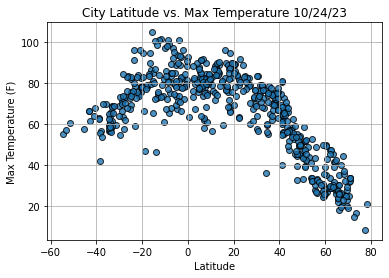

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

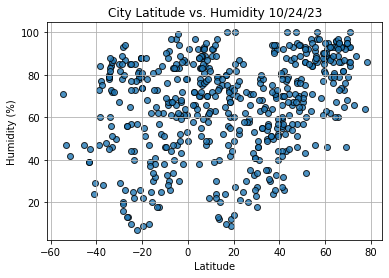

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

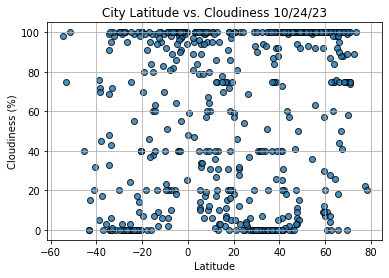

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

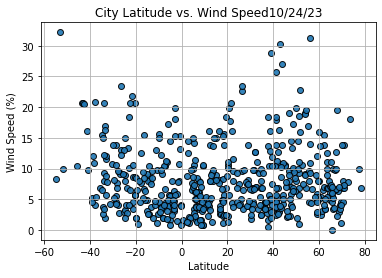

In [20]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolors='black', linewidths=1, marker='o',
           alpha=0.9, label='Cities')

# Incorporate othe rgraph properties.
plt.title(f'City Latitude vs. Wind Speed'+time.strftime('%x'))
plt.ylabel('Wind Speed (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/fig4.png')

# Show plot
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index_13 = city_data_df.loc[13]
index_13

City                       Usinsk
Country                        RU
Date          2023-10-24 19:10:41
Lat                       65.9939
Lng                       57.5281
Max Temp                    18.07
Humidity                       95
Cloudiness                     95
Wind Speed                   10.0
Name: 13, dtype: object

In [25]:
city_data_df.loc[(city_data_df['Lat']>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Jamestown,US,2023-10-24 19:10:37,42.0970,-79.2353,72.99,26,20,12.66
4,Vila Franca Do Campo,PT,2023-10-24 19:10:38,37.7167,-25.4333,70.21,91,84,13.73
6,Ndele,CF,2023-10-24 19:10:38,8.4109,20.6473,75.06,70,95,1.57
8,Paamiut,GL,2023-10-24 19:10:39,61.9940,-49.6678,33.75,62,4,6.44
9,San Cristobal,VE,2023-10-24 19:10:40,7.7669,-72.2250,84.38,47,100,5.55


In [27]:
# Create Northern and Southern Hemispheres DataFrames
northern_hemi_df = city_data_df[(city_data_df['Lat']>=0)]
southern_hemi_df = city_data_df[(city_data_df['Lat']<0)]

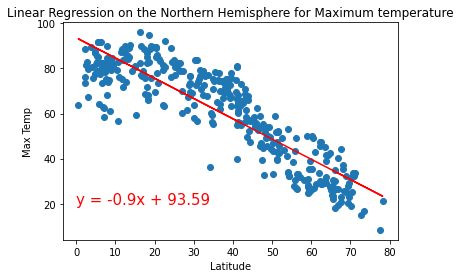

In [39]:
# Linear regression on the Northern hemisphere.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
for Maximum temperature', 'Max Temp', (0,20))

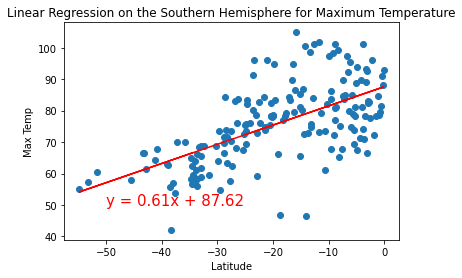

In [36]:
# Linear regression on the Southern hemisphere.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \
for Maximum Temperature', 'Max Temp', (-50, 50))

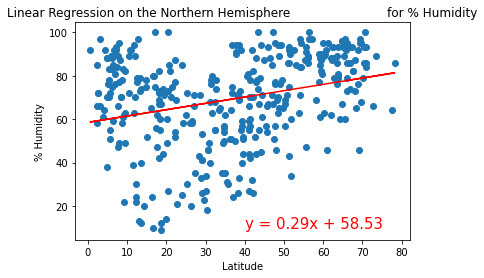

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

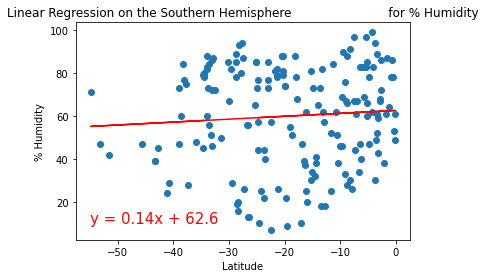

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,10))

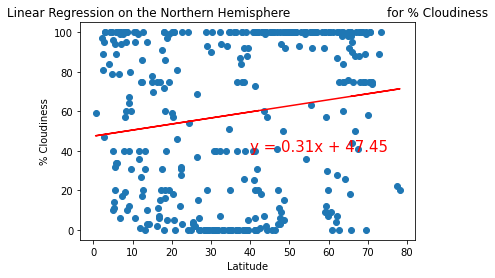

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,40))

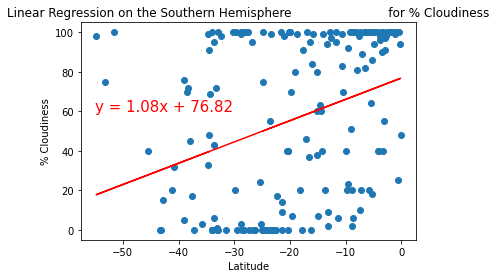

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,60))

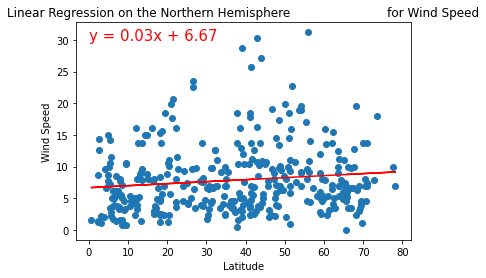

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,30))

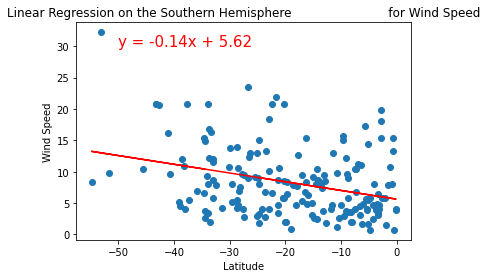

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,30))